In [1]:
import pandas as pd
import matplotlib.pyplot as plt

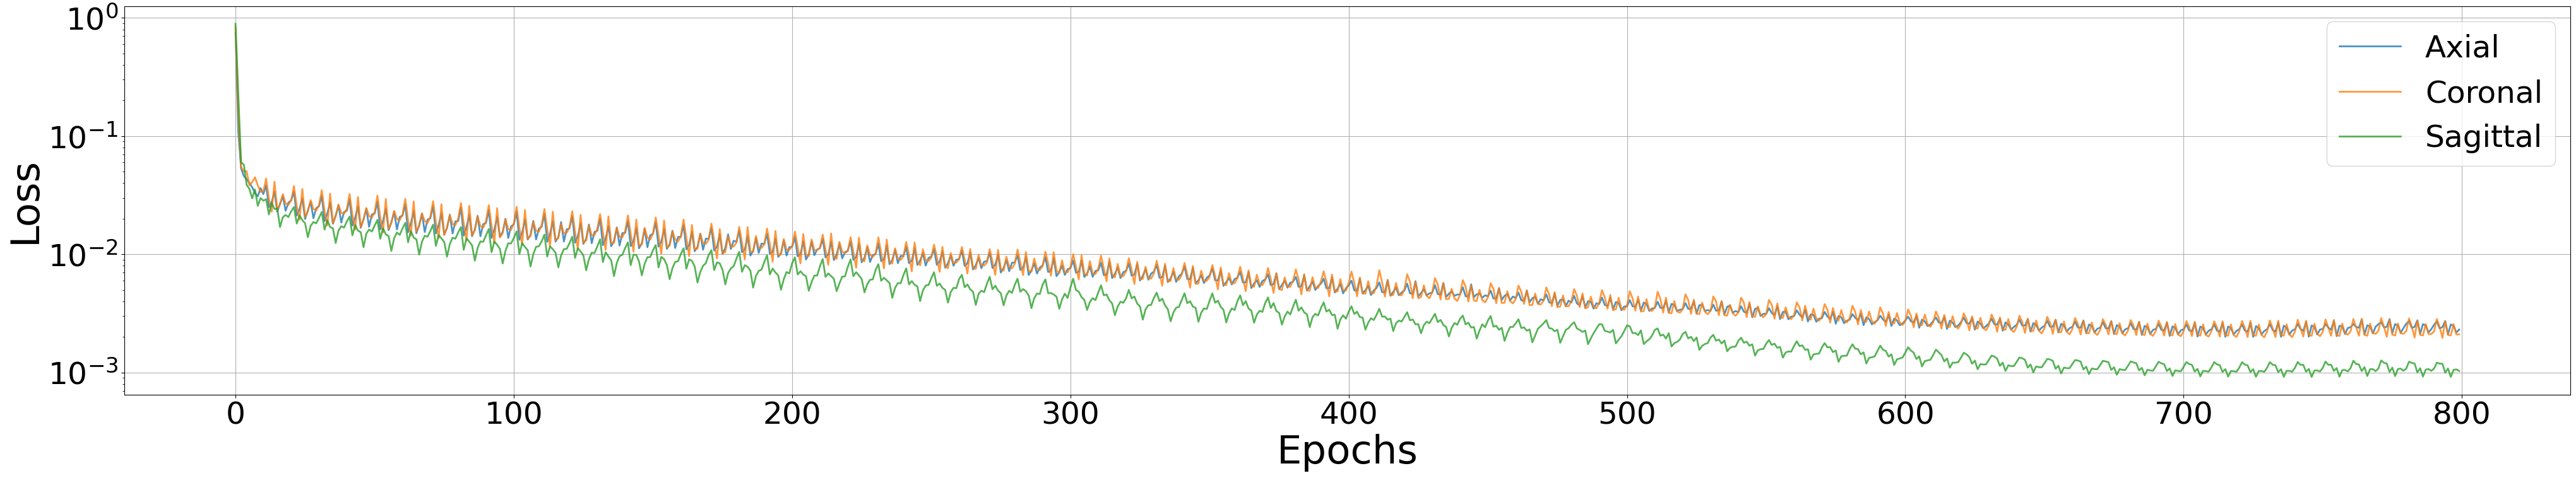

In [2]:
# Define the base folder path
base_path = r'D:\Research\Vision\mra\root\models\diffusion\oasis-2'

# Define the relative paths for the different log files
log_files = {
    'axial': r'axial-model-log\training_log.csv',
    'coronal': r'coronal-model-log\training_log.csv',
    'sagittal': r'sagittal-model-log\training_log.csv'
}

# Dictionary to store DataFrames
logs = {}

# Load the CSV files into a dictionary
for key, relative_path in log_files.items():
    file_path = f"{base_path}\\{relative_path}"
    df = pd.read_csv(file_path)
    logs[key] = df

# Plotting the "Loss" values for all models in log scale
plt.figure(figsize=(50, 8))

# Loop over the logs dictionary to plot the Loss values for each model
for key, df in logs.items():
    if 'Loss' in df.columns:
        plt.plot(df['Loss'], label=f'{key.capitalize()}', linewidth=2, alpha=0.8)
    else:
        print(f"Warning: 'Loss' column not found in {key} model log.")

# Adding plot labels and title
plt.xlabel('Epochs', fontsize=45)
plt.ylabel('Loss', fontsize=45)

# Increase the font size of axis tick labels
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

# Add a legend with increased font size
plt.legend(fontsize=35)

# Set the Y-axis to a logarithmic scale
plt.yscale('log')

# Show gridlines for better readability
plt.grid(True)

# Save the figure with tight bounding box
plt.savefig('../plots/outputs/diffusion-train.pdf', bbox_inches='tight')

# Show the plot
plt.show()